In [1]:
# Step 1: Install Required Packages (if not already installed)
!pip install pandas matplotlib seaborn boto3 --quiet
!pip install s3fs


In [2]:
# Step 2: Import Libraries
import pandas as pd
import boto3
import io
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO

In [3]:
df = pd.read_csv("s3://cse-projectdataviz/Clustering.csv")
df.head()

,Recency,Frequency,Monetary,K-MeansCluster,GMMCluster
0,23,9,6620.48,1,3
1,16,12,5162.91,1,3
2,89,4,1649.50,1,2
3,65,1,140.34,1,2
4,0,5,1857.46,1,3


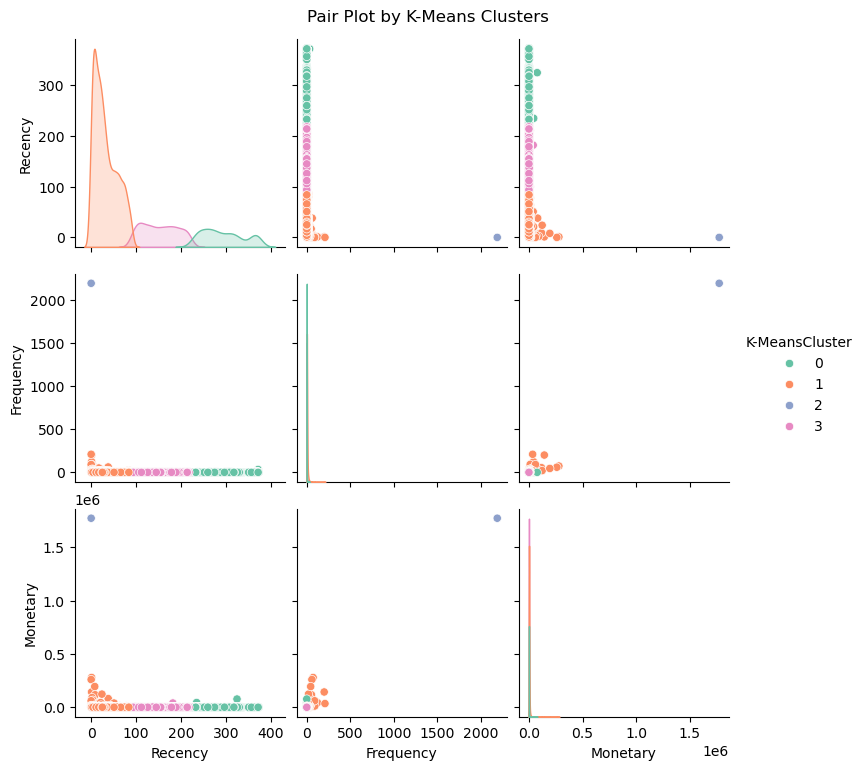

Saved K-Means Pairplot to S3: s3://cse-projectdataviz/pairplotKMeans.png


In [4]:

# Drop GMM cluster column if exists
df_kmeans = df.drop(columns=['GMMCluster'])

# Pair Plot for K-Means
sns.pairplot(df_kmeans, hue="K-MeansCluster", palette="Set2")
plt.suptitle("Pair Plot by K-Means Clusters", y=1.02)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

bucket_name = 'cse-projectdataviz'
key = 'pairplotKMeans.png'
s3 = boto3.client('s3')
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved K-Means Pairplot to S3: s3://{bucket_name}/{key}")


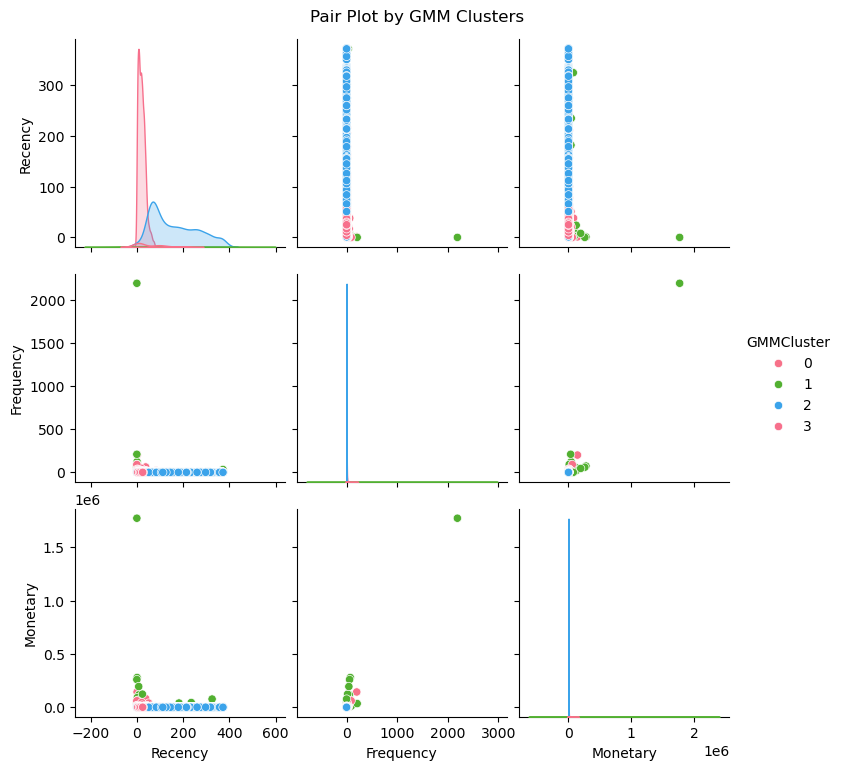

Saved GMM Pairplot to S3: s3://cse-projectdataviz/pairplotGMM.png


In [5]:
# Drop K-Means cluster column if exists
df_gmm = df.drop(columns=['K-MeansCluster'])

# Pair Plot for GMM
sns.pairplot(df_gmm, hue="GMMCluster", palette="husl")
plt.suptitle("Pair Plot by GMM Clusters", y=1.02)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'pairplotGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved GMM Pairplot to S3: s3://{bucket_name}/{key}")


Boxplots for Each Cluster (KMeans & GMM)
Goal: Show distribution of features per cluster.

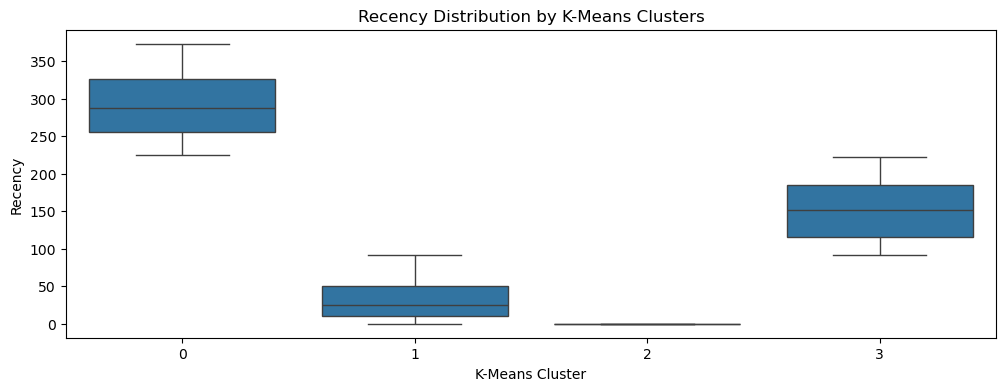

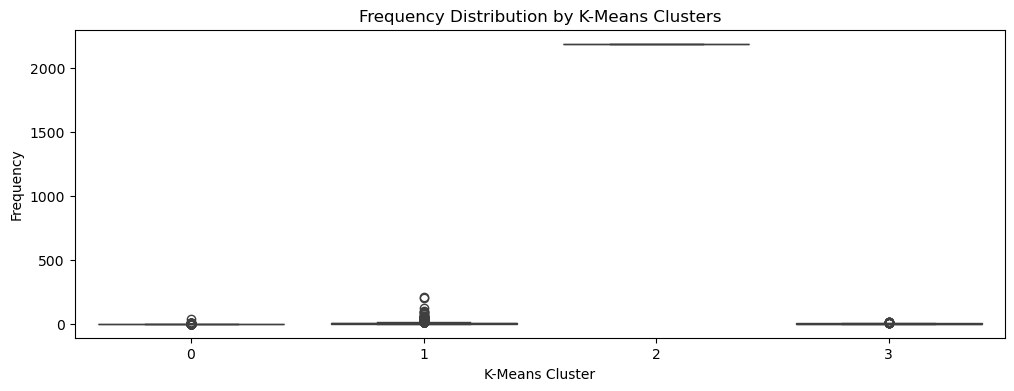

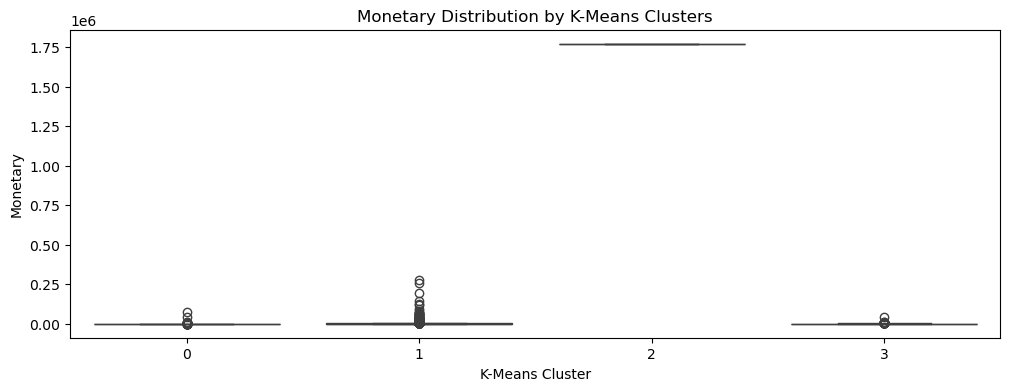

Saved boxplot to S3: s3://cse-projectdataviz/boxplotkmeans.png


In [6]:
features = ['Recency', 'Frequency', 'Monetary']

for col in features:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x='K-MeansCluster', y=col, data=df)
    plt.title(f'{col} Distribution by K-Means Clusters')
    plt.xlabel('K-Means Cluster')
    plt.ylabel(col)
    plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'boxplotkmeans.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved boxplot to S3: s3://{bucket_name}/{key}")

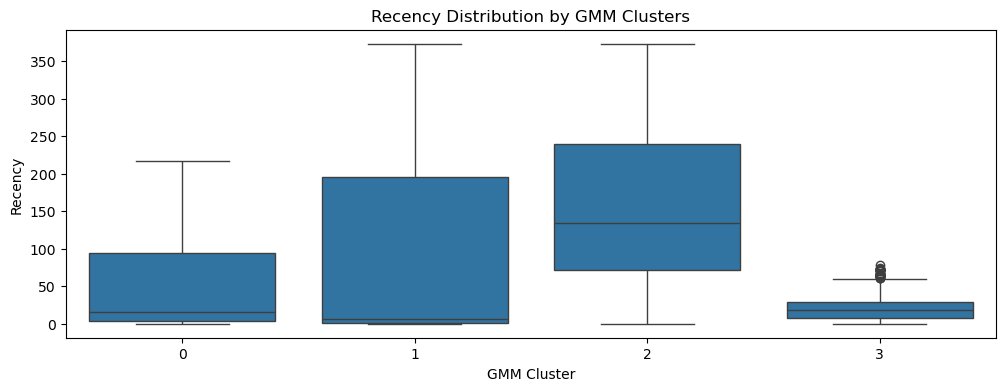

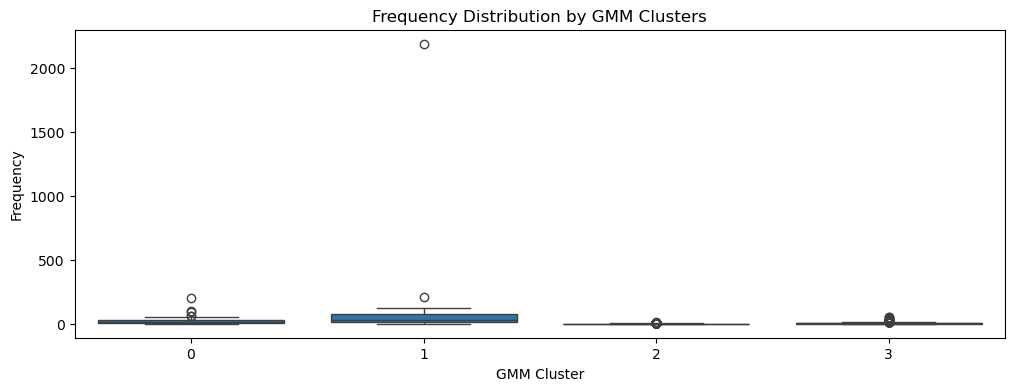

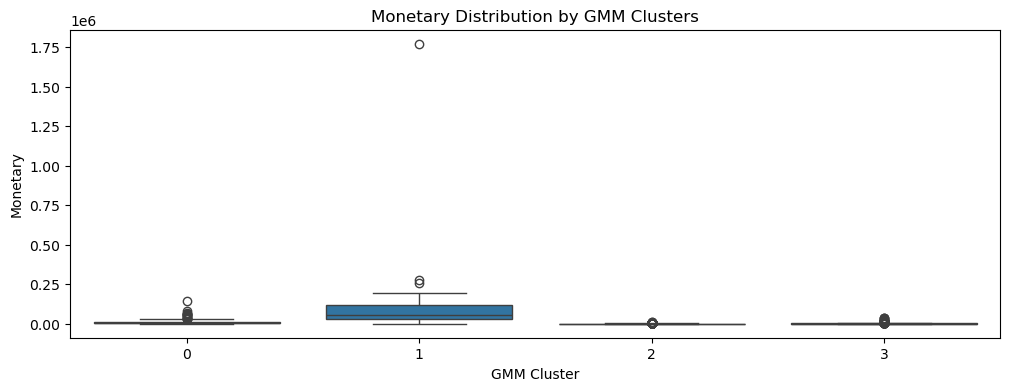

Saved boxplot to S3: s3://cse-projectdataviz/boxplotGMM.png


In [7]:
features = ['Recency', 'Frequency', 'Monetary']

for col in features:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x='GMMCluster', y=col, data=df)
    plt.title(f'{col} Distribution by GMM Clusters')
    plt.xlabel('GMM Cluster')
    plt.ylabel(col)
    plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'boxplotGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved boxplot to S3: s3://{bucket_name}/{key}")

Centroid Radar Chart for Cluster Profiles
Goal: Understand average feature values per cluster.

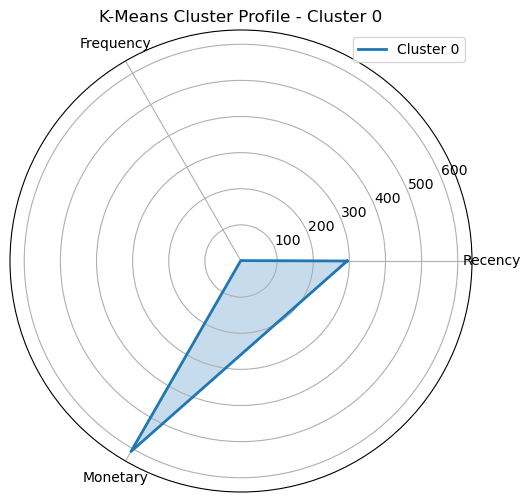

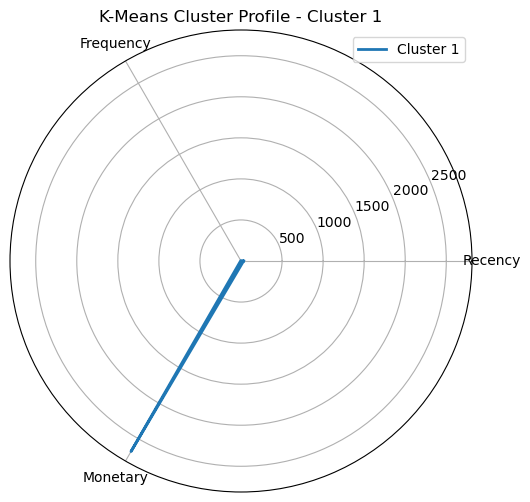

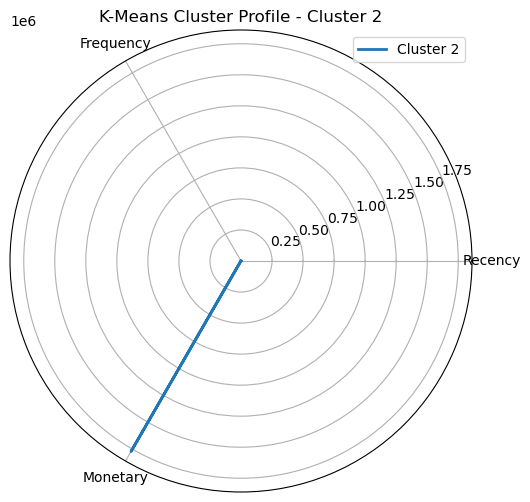

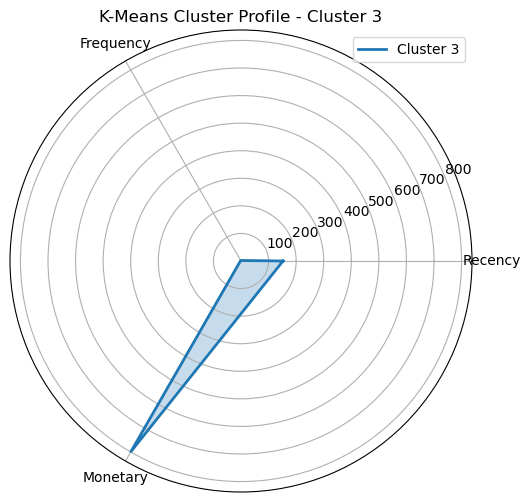

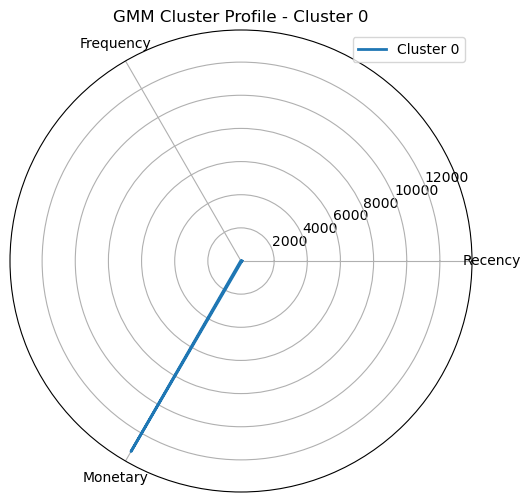

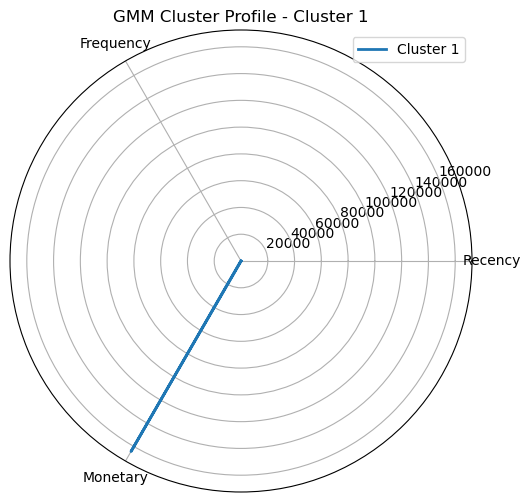

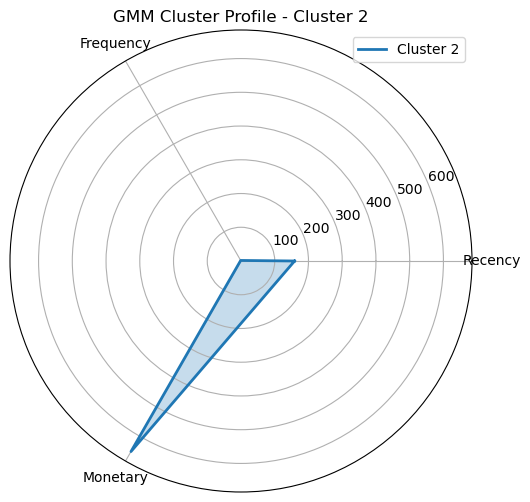

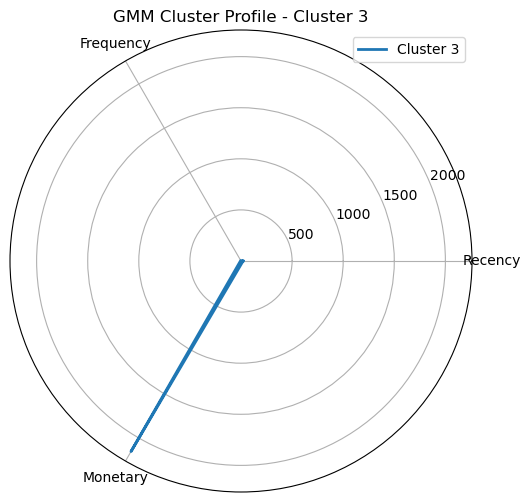

Saved Centroid Radar Chart  to S3: s3://cse-projectdataviz/radar.png


In [8]:
import numpy as np

def plot_radar_chart(cluster_data, title):
    categories = list(cluster_data.columns)
    N = len(categories)

    for idx, row in cluster_data.iterrows():
        values = row.tolist()
        values += values[:1]  # repeat first value to close the circle
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]

        plt.figure(figsize=(6, 6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories)
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {idx}')
        ax.fill(angles, values, alpha=0.25)
        plt.title(f'{title} - Cluster {idx}')
        plt.legend()
        plt.show()

# Group means
kmeans_profile = df.groupby('K-MeansCluster')[['Recency', 'Frequency', 'Monetary']].mean()
gmm_profile = df.groupby('GMMCluster')[['Recency', 'Frequency', 'Monetary']].mean()

plot_radar_chart(kmeans_profile, "K-Means Cluster Profile")
plot_radar_chart(gmm_profile, "GMM Cluster Profile")

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'radar.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Centroid Radar Chart  to S3: s3://{bucket_name}/{key}")

Heatmap of Cluster Centroids
Goal: Compare how features differ across clusters.

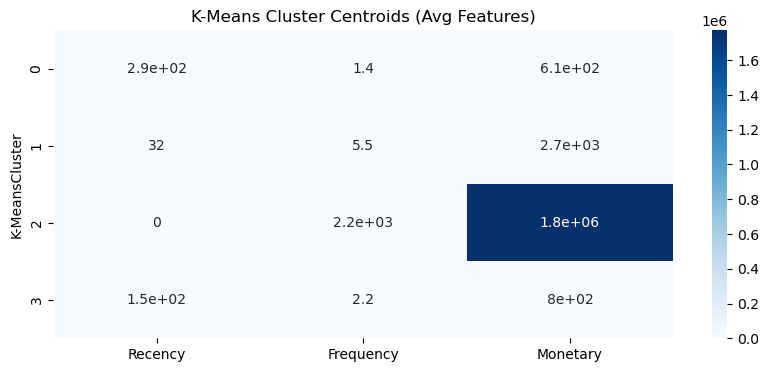

Saved Heatmap of Cluster Centroids for K-Means to S3: s3://cse-projectdataviz/heatmapclustercentroidsKMeans.png


In [9]:
plt.figure(figsize=(10, 4))
sns.heatmap(kmeans_profile, annot=True, cmap="Blues")
plt.title("K-Means Cluster Centroids (Avg Features)")
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'heatmapclustercentroidsKMeans.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Heatmap of Cluster Centroids for K-Means to S3: s3://{bucket_name}/{key}")

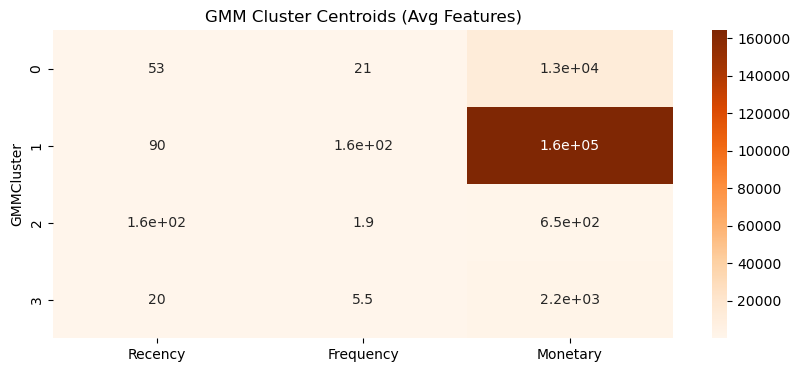

Saved Heatmap of Cluster Centroids for GMM to S3: s3://cse-projectdataviz/heatmapclustercentroidsGMM.png


In [10]:
plt.figure(figsize=(10, 4))
sns.heatmap(gmm_profile, annot=True, cmap="Oranges")
plt.title("GMM Cluster Centroids (Avg Features)")
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'heatmapclustercentroidsGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Heatmap of Cluster Centroids for GMM to S3: s3://{bucket_name}/{key}")

Average RFM Scores per Segment

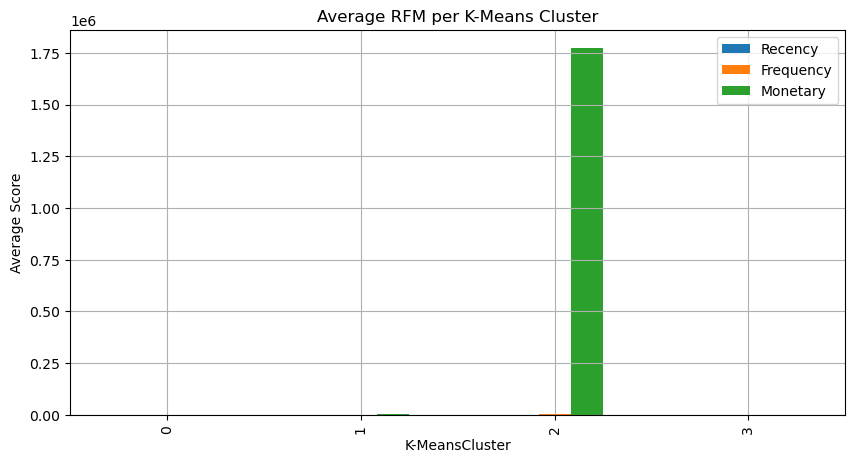

Saved Average RFM Scores of K-Means to S3: s3://cse-projectdataviz/AvgRFMKMeans.png


In [11]:
# Average RFM by K-Means
kmeans_avg_rfm = df.groupby("K-MeansCluster")[["Recency", "Frequency", "Monetary"]].mean()
kmeans_avg_rfm.plot(kind='bar', figsize=(10, 5), title='Average RFM per K-Means Cluster')
plt.ylabel("Average Score")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'AvgRFMKMeans.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Average RFM Scores of K-Means to S3: s3://{bucket_name}/{key}")

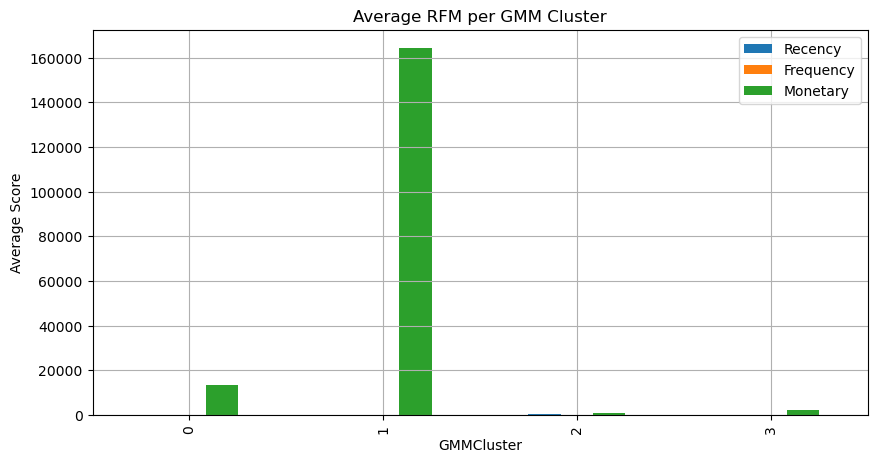

Saved Average RFM Scores of GMM to S3: s3://cse-projectdataviz/AvgRFMGMM.png


In [12]:
# Average RFM by GMM
gmm_avg_rfm = df.groupby("GMMCluster")[["Recency", "Frequency", "Monetary"]].mean()
gmm_avg_rfm.plot(kind='bar', figsize=(10, 5), title='Average RFM per GMM Cluster')
plt.ylabel("Average Score")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'AvgRFMGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Average RFM Scores of GMM to S3: s3://{bucket_name}/{key}")

Distribution of Monetary Value by Segment

/tmp/ipykernel_116/361480608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='K-MeansCluster', y='Monetary', palette='Blues')


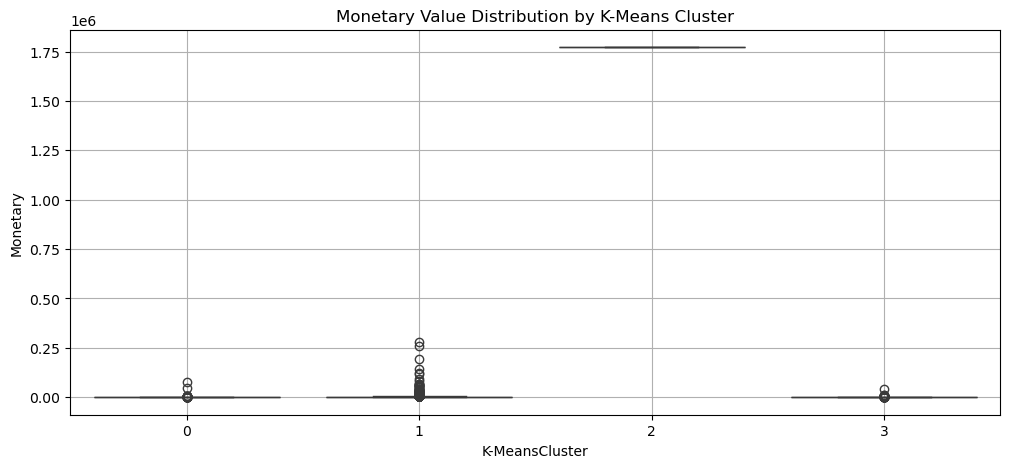

Saved Distribution of Monetary Value by Segment of K-Means to S3: s3://cse-projectdataviz/MonetaryKMeans.png


In [13]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='K-MeansCluster', y='Monetary', palette='Blues')
plt.title("Monetary Value Distribution by K-Means Cluster")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'MonetaryKMeans.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Distribution of Monetary Value by Segment of K-Means to S3: s3://{bucket_name}/{key}")

/tmp/ipykernel_116/3308720253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='GMMCluster', y='Monetary', palette='Oranges')


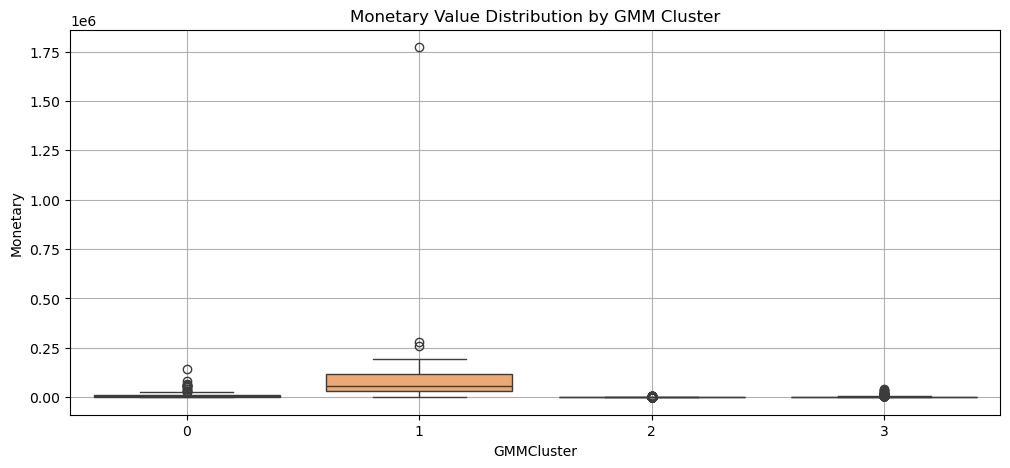

Saved Distribution of Monetary Value by Segment of GMM to S3: s3://cse-projectdataviz/MonetaryGMM.png


In [14]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='GMMCluster', y='Monetary', palette='Oranges')
plt.title("Monetary Value Distribution by GMM Cluster")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'MonetaryGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Distribution of Monetary Value by Segment of GMM to S3: s3://{bucket_name}/{key}")

Most Frequent Customers per Segment

/tmp/ipykernel_116/1012618580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='K-MeansCluster', y='Frequency', palette='Purples')


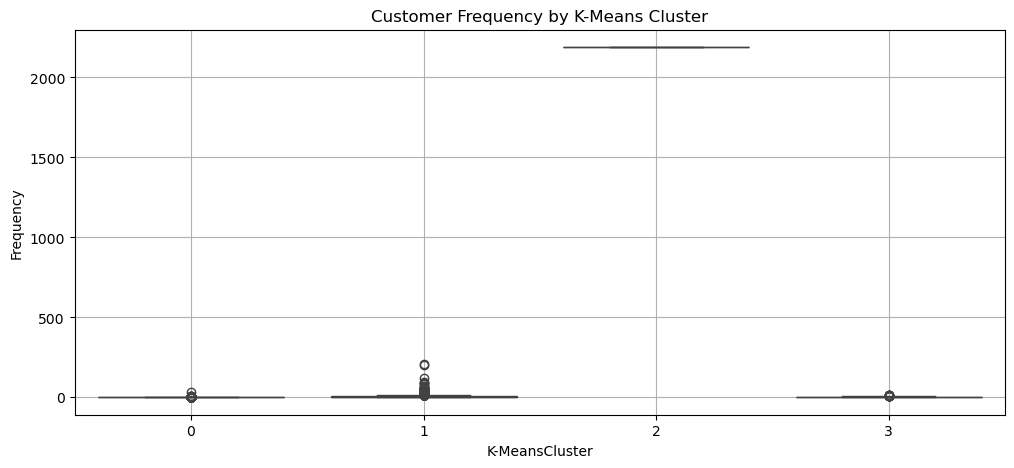

Saved Most Frequent Customers per Segment of K-Means to S3: s3://cse-projectdataviz/FrequentCustomersKMeans.png


In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='K-MeansCluster', y='Frequency', palette='Purples')
plt.title("Customer Frequency by K-Means Cluster")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'FrequentCustomersKMeans.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Most Frequent Customers per Segment of K-Means to S3: s3://{bucket_name}/{key}")

/tmp/ipykernel_116/4101572334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='GMMCluster', y='Frequency', palette='Greens')


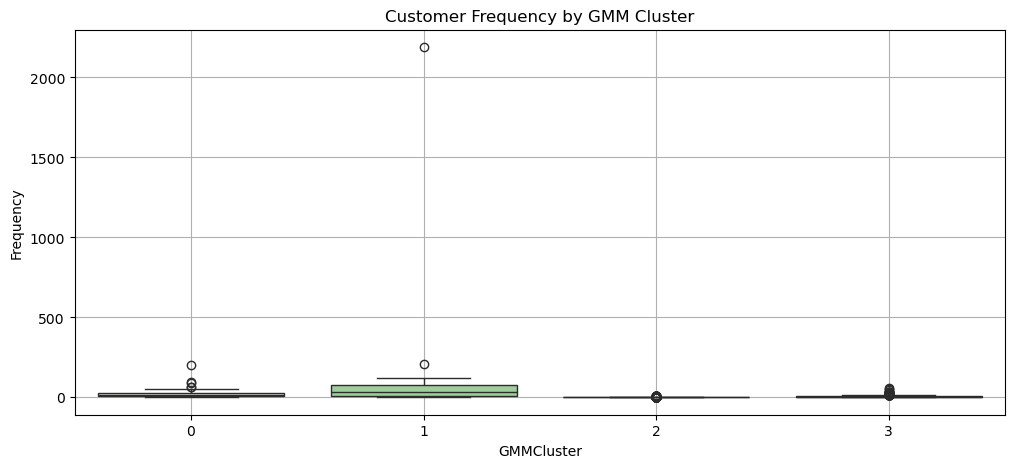

Saved Most Frequent Customers per Segment of GMM to S3: s3://cse-projectdataviz/FrequentCustomersGMM.png


In [16]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='GMMCluster', y='Frequency', palette='Greens')
plt.title("Customer Frequency by GMM Cluster")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'FrequentCustomersGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Most Frequent Customers per Segment of GMM to S3: s3://{bucket_name}/{key}")

Churn Risk: High Recency, Low Frequency & Monetary

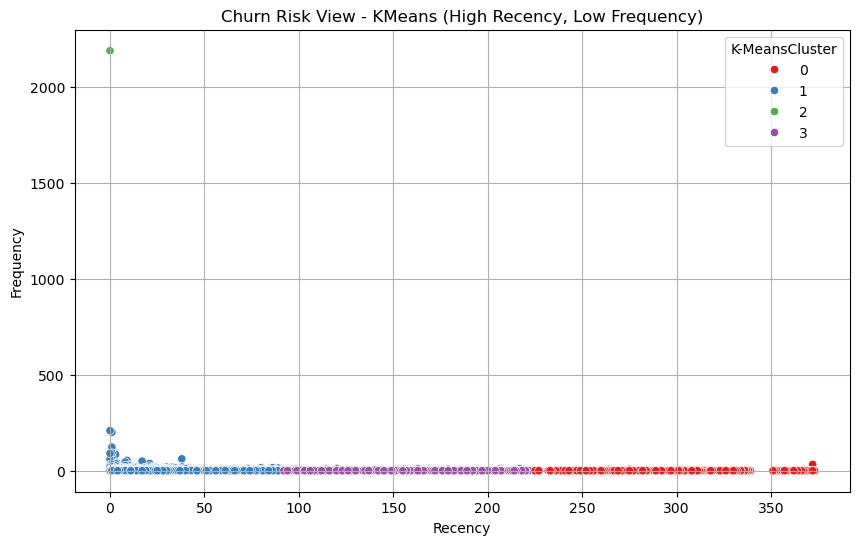

Saved Churn Risk of K-Means to S3: s3://cse-projectdataviz/ChurnRiskKMeans.png


In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Recency', y='Frequency', hue='K-MeansCluster', palette='Set1')
plt.title("Churn Risk View - KMeans (High Recency, Low Frequency)")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'ChurnRiskKMeans.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Churn Risk of K-Means to S3: s3://{bucket_name}/{key}")

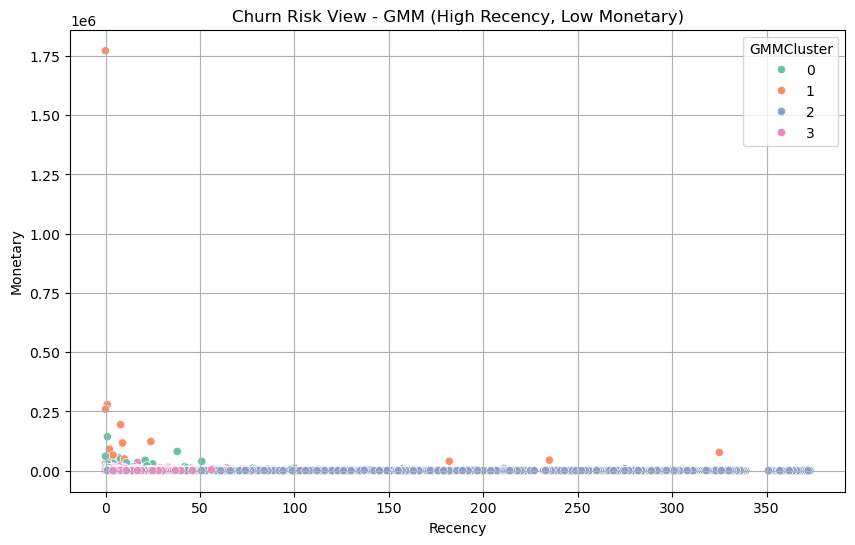

Saved Churn Risk of GMM to S3: s3://cse-projectdataviz/ChurnRiskGMM.png


In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Recency', y='Monetary', hue='GMMCluster', palette='Set2')
plt.title("Churn Risk View - GMM (High Recency, Low Monetary)")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.grid(True)
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'ChurnRiskGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved Churn Risk of GMM to S3: s3://{bucket_name}/{key}")

Scatter Plot – K-Means Clusters

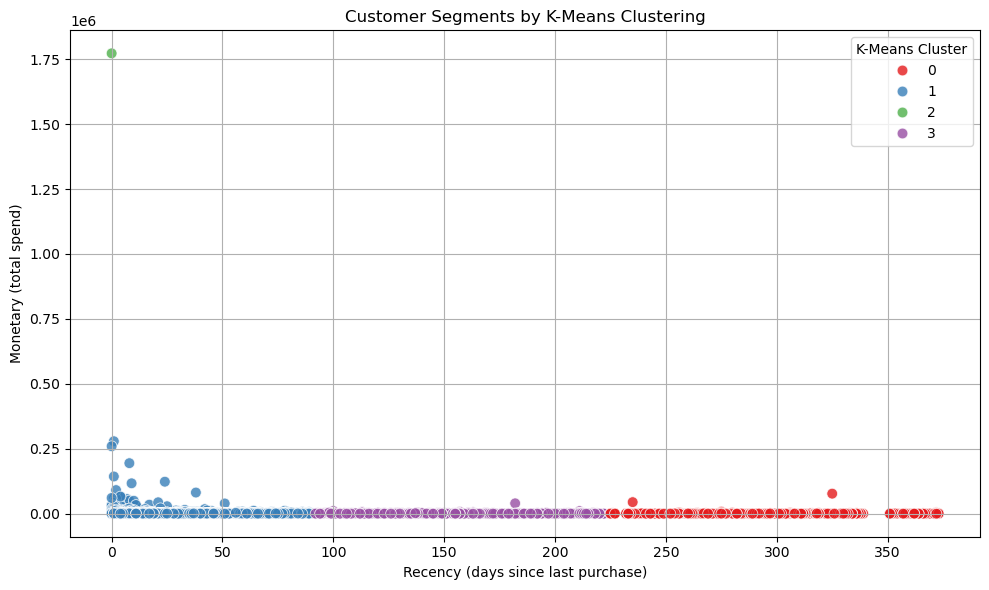

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Recency",
    y="Monetary",
    hue="K-MeansCluster",
    palette="Set1",
    s=60,
    alpha=0.8
)
plt.title("Customer Segments by K-Means Clustering")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Monetary (total spend)")
plt.legend(title="K-Means Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


Scatter Plot – GMM Clusters

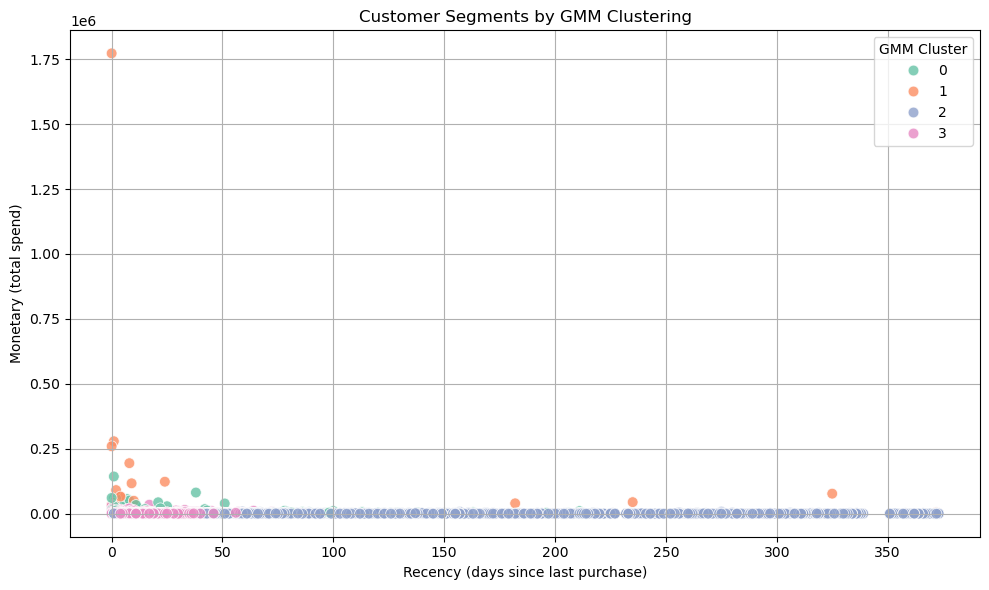

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Recency",
    y="Monetary",
    hue="GMMCluster",
    palette="Set2",
    s=60,
    alpha=0.8
)
plt.title("Customer Segments by GMM Clustering")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Monetary (total spend)")
plt.legend(title="GMM Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

Cluster-wise Average Feature Heatmap
Goal: Compare average RFM scores across clusters.

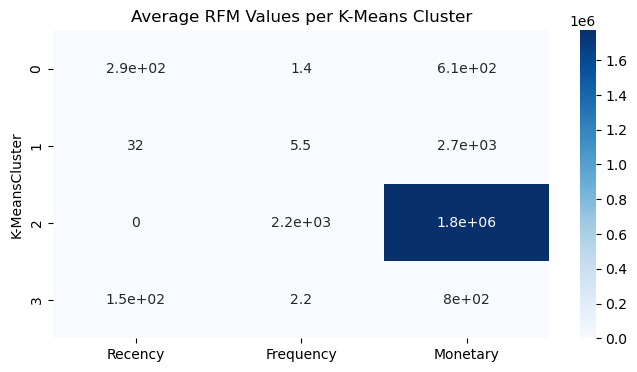

In [21]:

# K-Means heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.groupby("K-MeansCluster")[["Recency", "Frequency", "Monetary"]].mean(), annot=True, cmap="Blues")
plt.title("Average RFM Values per K-Means Cluster")
plt.show()

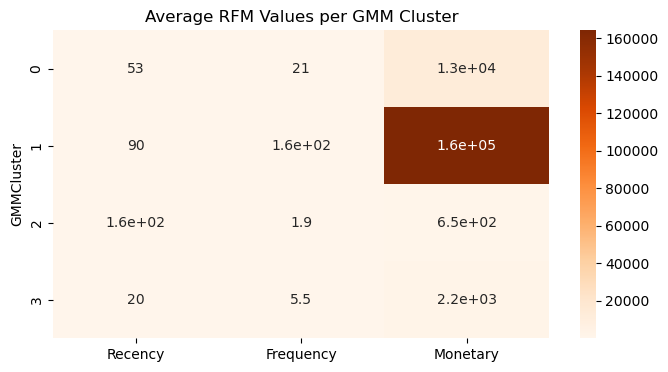

In [22]:
# GMM heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.groupby("GMMCluster")[["Recency", "Frequency", "Monetary"]].mean(), annot=True, cmap="Oranges")
plt.title("Average RFM Values per GMM Cluster")
plt.show()

Clustering Plot for KMeans and GMM

Apply Log Transformation Before PCA

In [23]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Apply log(1 + x) to handle skewness (RFM usually has long tail)
log_transform = FunctionTransformer(func=lambda x: np.log1p(x), validate=True)
rfm_log = log_transform.fit_transform(df[['Recency', 'Frequency', 'Monetary']])


Re-run PCA on log-transformed data

In [24]:
from sklearn.decomposition import PCA

# PCA after log transformation
pca = PCA(n_components=2)
reduced = pca.fit_transform(rfm_log)

df['PC1'] = reduced[:, 0]
df['PC2'] = reduced[:, 1]


Visualize 

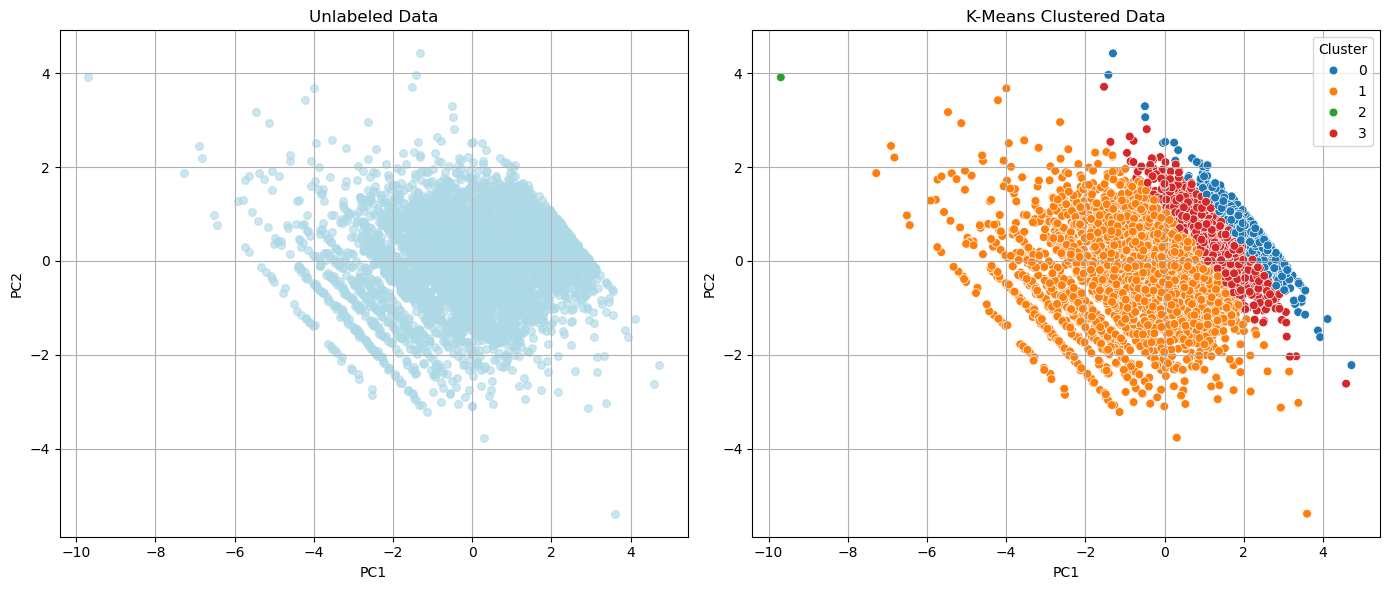

Saved Clustering of K-Means to S3: s3://cse-projectdataviz/ClusteringKMeans.png


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# K-Means cluster plot
plt.figure(figsize=(14, 6))
# Unlabeled Data
plt.subplot(1, 2, 1)
plt.scatter(df['PC1'], df['PC2'], s=30, alpha=0.6, color='lightblue')
plt.title("Unlabeled Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
# K-Means Clustered
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='K-MeansCluster', data=df, palette='tab10', s=40)
plt.title("K-Means Clustered Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
key = 'ClusteringKMeans.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()
print(f"Saved Clustering of K-Means to S3: s3://{bucket_name}/{key}")

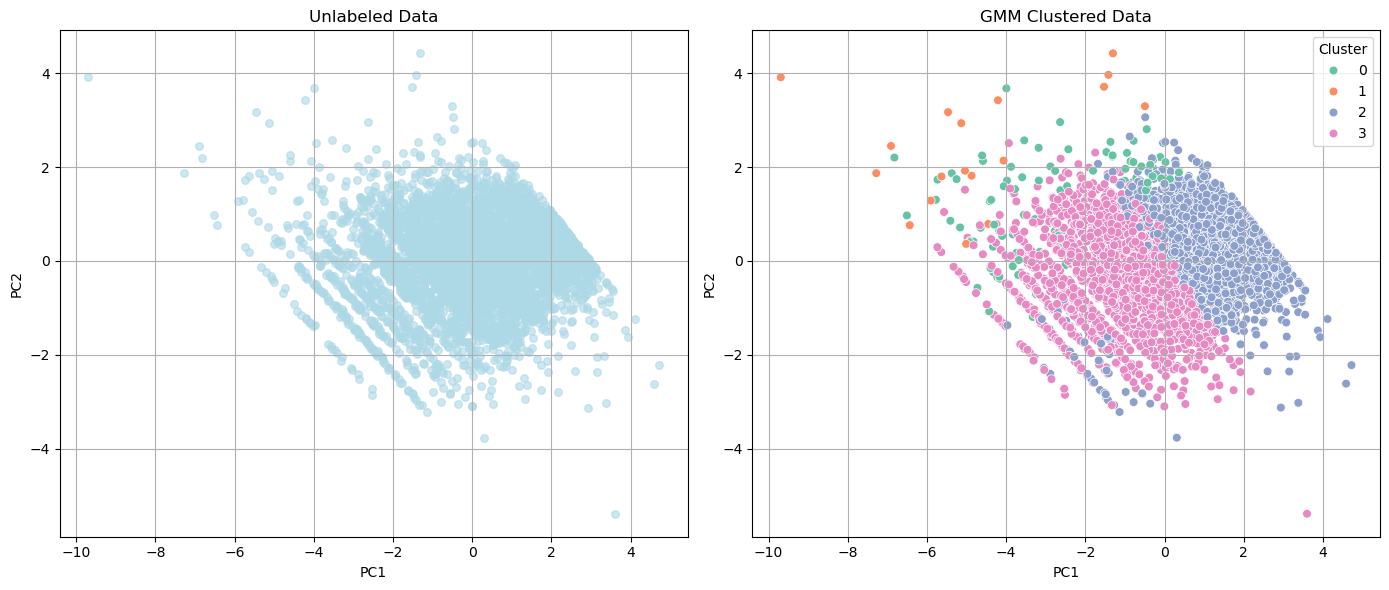

Saved clustering of GMM to S3: s3://cse-projectdataviz/ClusteringGMM.png


In [26]:
plt.figure(figsize=(14, 6))

# Unlabeled Data
plt.subplot(1, 2, 1)
plt.scatter(df['PC1'], df['PC2'], s=30, alpha=0.6, color='lightblue')
plt.title("Unlabeled Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# GMM Clustered
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='GMMCluster', data=df, palette='Set2', s=40)
plt.title("GMM Clustered Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()

# Save and upload
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

key = 'ClusteringGMM.png'
s3.upload_fileobj(buffer, bucket_name, key)
plt.close()

print(f"Saved clustering of GMM to S3: s3://{bucket_name}/{key}")
